<a href="https://colab.research.google.com/github/Yamito548/Proyecto-terremoto/blob/main/Act_3_7_SNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este es un trabajo basado en un reto de **Driven data**. El dataset que vamos a manipular es de riego de derrumbamiento de terremotos. Los niveles que tenemos que conseguir es decir la "y" son: **(1 - low damage, 2 - medium amount of
damage, 3 - complete destruction)**. La competición la puedes encontrar [aquí](https://www.drivendata.org/competitions/57/nepal-earthquake/data/).

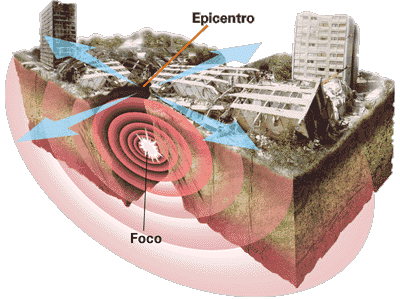

[Enlace foto terremoto](https://www.educa2.madrid.org/web/argos/inicio/-/visor/signos-precursores-de-los-terremotos-)

# Importar datos desde mi github

Librerías

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
github_personal = "https://github.com/Yamito548/Proyecto-terremoto"
test_values = "https://raw.githubusercontent.com/Yamito548/Proyecto-terremoto/main/test_values.csv"
train_labels = "https://raw.githubusercontent.com/Yamito548/Proyecto-terremoto/main/train_labels.csv"
train_values = "https://raw.githubusercontent.com/Yamito548/Proyecto-terremoto/main/train_values.csv"

#Cargamos los datasets.
# data_test_values = pd.read_csv(test_values)
# data_train_labels = pd.read_csv(train_labels)
# data_train_values = pd.read_csv(train_values)

#Otra forma de hacerlo, algo diferente a lo que suelo hacer.
X_train = pd.read_csv(train_values)
y_train = pd.read_csv(train_labels)
X_test_org = pd.read_csv(test_values)

In [3]:
#Vamos a combinar  los datasets de labels y X_train para poder modificarlo yo mismo.
data = pd.concat([X_train,y_train['damage_grade']], axis=1)
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


Vemos el dataset todo junto. Podemos ver que hay muchas filas siendo de los datasets más grandes que he tenido que manipular, teniendo **260601** filas y **40** columnas. Son demasiadas columnas por lo que tendré que seleccionar de alguna forma cuales tendremos.

Como el dataset es muy grande y me esta dando problemas para poder trabajar con el, voy a reducir su tamaño para que pueda realizar las tareas correctamente.

# Manipulamos los datos

Missing values

In [4]:
missing_values = data.isnull().sum()
missing_values

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Como solemos hacer, vamos a comprobar si hay datos faltantes dentro del dataset, los cuales podrían dar problemas a la hora de entrenar el modelo. Como podemos ver no hay ni un solo dato faltante. En caso de que los hubiera, lo que hubiera hecho sería una media por cada columna para rellenar los datos faltantes.

Normalizar datos

In [5]:
ver_tipos = data["foundation_type"].unique()
ver_tipos

array(['r', 'w', 'i', 'u', 'h'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
codificación = LabelEncoder()

for columna in data.columns:
    # Verificamos si la columna contiene texto (str)
    if data[columna].dtype == "object":
        # Aplicamos la codificación de etiquetas solo a las columnas de texto
        data[columna] = codificación.fit_transform(data[columna])

#Repetimos el proceso para los valores tipo varchar de X_test
for columna in X_test_org.columns:
    # Verificamos si la columna contiene texto (str)
    if X_test_org[columna].dtype == "object":
        # Aplicamos la codificación de etiquetas solo a las columnas de texto
        X_test_org[columna] = codificación.fit_transform(X_test_org[columna])

He visto que hay algunas columnas las cuales son tipo varchar, es por ello que las voy a pasar a numérico para poder procesarlo mejor.

# Matriz de correlación

Selección de características.

<Axes: >

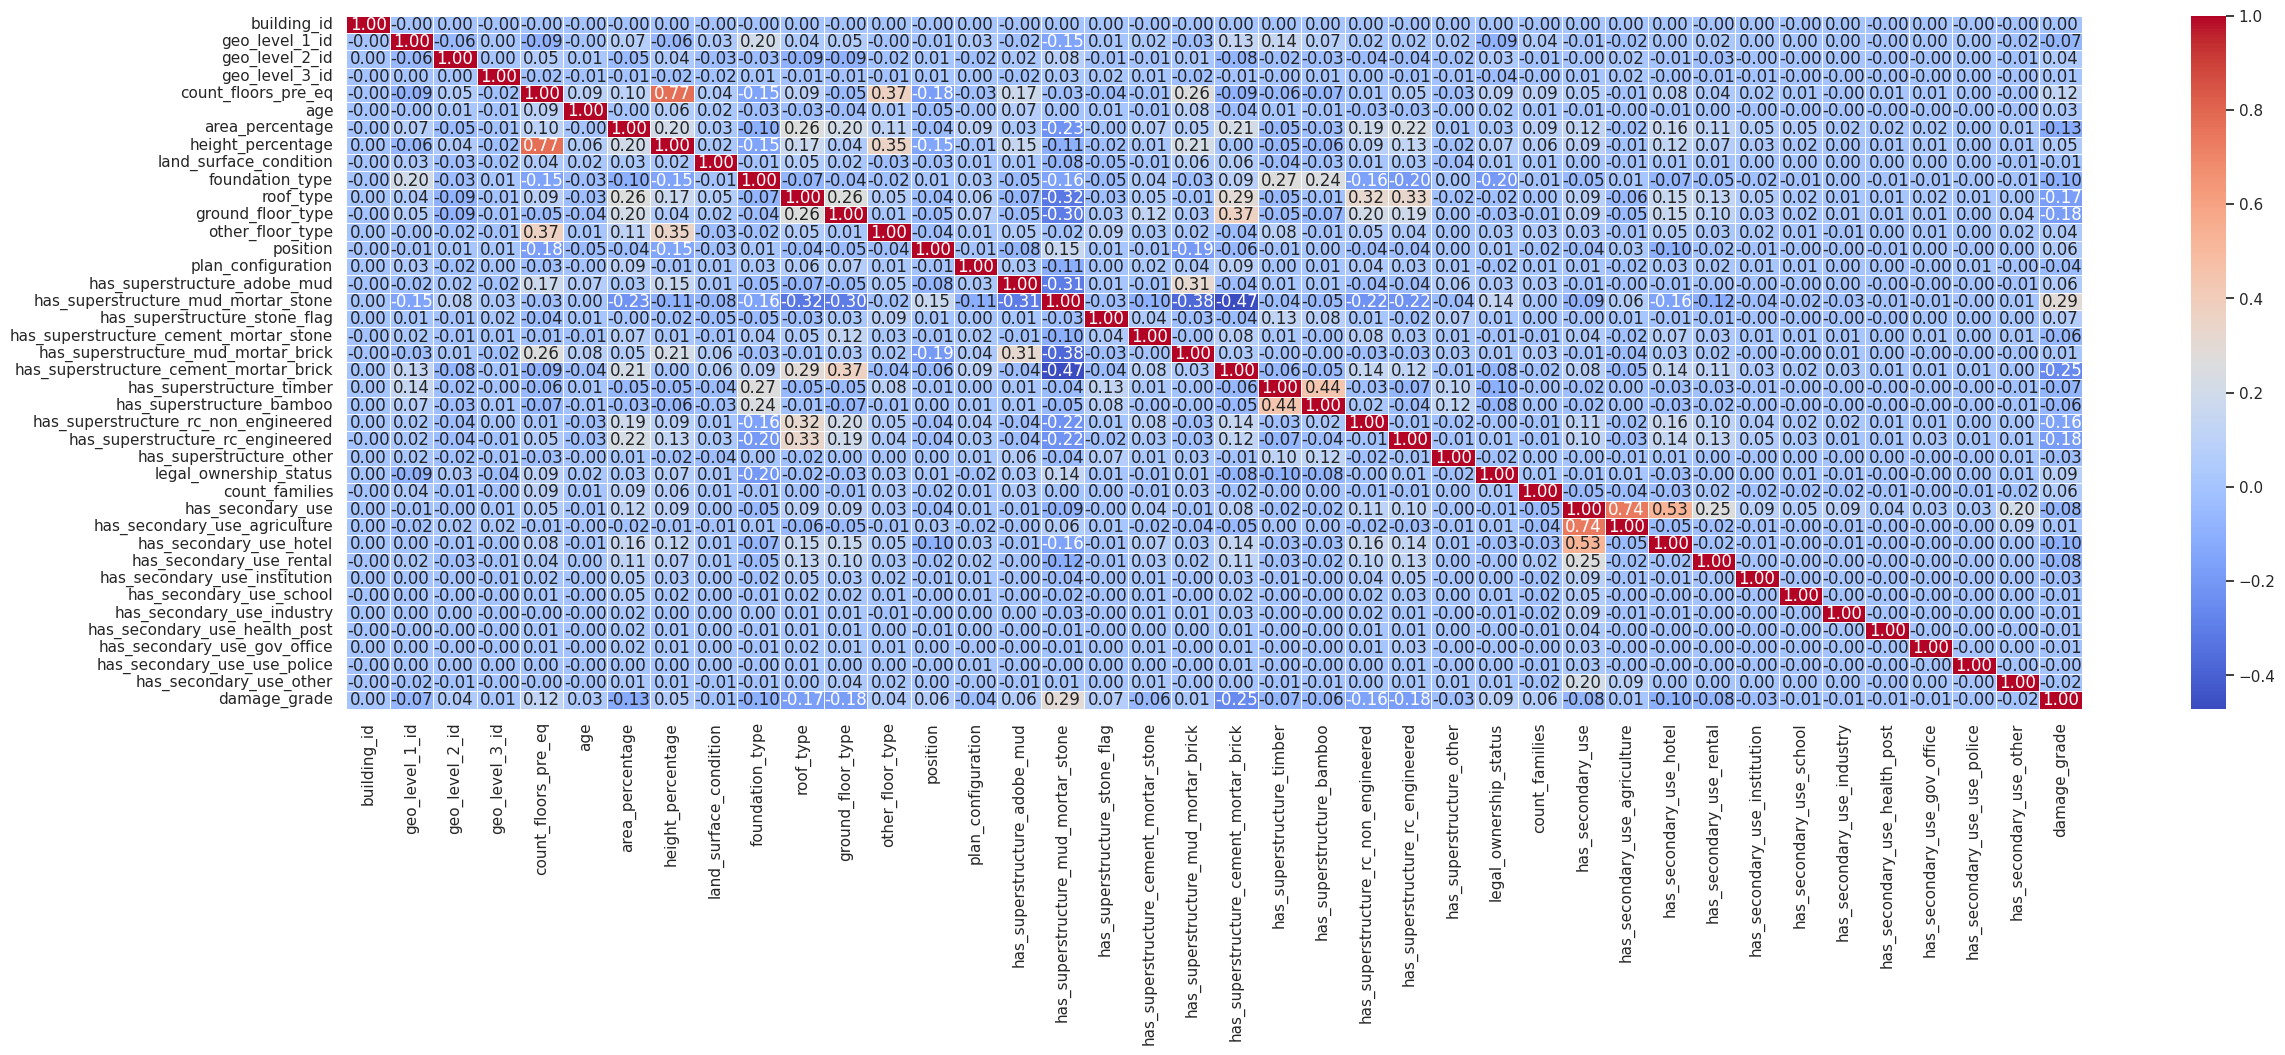

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_correlacion = data.corr()
sns.set(style='white')
plt.figure(figsize=(28,9))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

Vamos a usar la matriz de correlación para poder ver como se relacionan todas las características entre sí. Lo bueno de este tipo de matriz es que con solo verla podremos sacar varias conclusiones debido a que va por colores y porcentajes. A mayor sea el número, mejor correlación será y a menor pues menor correlación tendrá llegando a existir el caso de que hayan correlaciones negativas. En este caso no veo muchas correlaciones negativas pero si que veo que son muy bajas viendo a priori pocas las cuales tengan una buena relación como puede ser count_floors_pre_eq con height_percentage la cual tiene una relación alta de **0.77** entre otros ejemplos.

# Reducción de los datos

In [8]:
#Esta parte del código la cogí de: https://github.com/hectorOliSan/SNS/blob/main/UT3%20-%20Algoritmos%20y%20herramientas%20para%20el%20aprendizaje%20supervisado/Actividad%203.10%20-%20Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento%20-%20Terremotos/Actividad_3_10_Predicci%C3%B3n_de_Riesgo_de_derrumbamiento_Terremotos.ipynb
def reducción(df):
  data1 = df[df["damage_grade"] == 1 ].head(5000)
  data2 = df[df["damage_grade"] == 2 ].head(5000)
  data3 = df[df["damage_grade"] == 3 ].head(5000)

  data = pd.concat([data1,data2,data3],axis=0)

  return data
data = reducción(data)
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
7,475515,20,323,12236,2,0,8,6,2,4,...,0,0,0,0,0,0,0,0,0,1
9,989500,26,886,994,1,0,13,4,2,1,...,0,0,0,0,0,0,0,0,0,1
36,864809,13,305,5956,2,0,9,8,2,2,...,0,0,0,0,0,0,0,0,0,1
45,440102,7,157,5265,1,5,11,3,0,1,...,0,1,0,0,0,0,0,0,0,1
49,402996,26,762,742,1,0,15,3,0,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14835,881634,7,641,6713,2,0,9,5,1,2,...,0,0,0,0,0,0,0,0,0,3
14836,571548,21,477,11240,3,15,7,7,2,2,...,0,0,0,0,0,0,0,0,0,3
14837,368894,17,856,5891,3,10,17,6,2,2,...,0,0,0,0,0,0,0,0,0,3
14842,522284,11,883,1550,3,50,3,8,2,2,...,0,0,0,0,0,0,0,0,0,3


El dataset era demasiado grande, por lo que tuve que reducir su tamaño de alguna forma para que no me petara el ordenador a la hora de trabajar con el dataset. En este caso busque código y encontré una solución de un compañero del año pasado, sencilla pero eficaz que es simplemente coger 5000 registros por cada grado de destrucción del terremoto, así asegurándome de que no haya sesgos y haya la misma cantidad de y de cada tipo.

# Escalamiento de los datos

In [9]:
#Dividimos los datos
X = data.drop(["damage_grade"],axis=1)
y = data["damage_grade"]
X

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
7,475515,20,323,12236,2,0,8,6,2,4,...,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,2,1,...,0,0,0,0,0,0,0,0,0,0
36,864809,13,305,5956,2,0,9,8,2,2,...,0,0,0,0,0,0,0,0,0,0
45,440102,7,157,5265,1,5,11,3,0,1,...,0,0,1,0,0,0,0,0,0,0
49,402996,26,762,742,1,0,15,3,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14835,881634,7,641,6713,2,0,9,5,1,2,...,0,0,0,0,0,0,0,0,0,0
14836,571548,21,477,11240,3,15,7,7,2,2,...,0,0,0,0,0,0,0,0,0,0
14837,368894,17,856,5891,3,10,17,6,2,2,...,0,0,0,0,0,0,0,0,0,0
14842,522284,11,883,1550,3,50,3,8,2,2,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X[X.columns] = scaler.fit_transform(X)
#Modificado para evitar
X_test_org[X_test_org.columns] = scaler.transform(X_test_org)
X

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
7,0.451643,0.666667,0.226349,0.974126,0.222222,0.000000,0.08,0.18750,1.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.939826,0.866667,0.620883,0.079134,0.111111,0.000000,0.13,0.12500,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.821394,0.433333,0.213735,0.474166,0.222222,0.000000,0.09,0.25000,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.418008,0.233333,0.110021,0.419155,0.111111,0.005025,0.11,0.09375,0.0,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.382765,0.866667,0.533987,0.059072,0.111111,0.000000,0.15,0.09375,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14835,0.837375,0.233333,0.449194,0.534432,0.222222,0.000000,0.09,0.15625,0.5,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14836,0.542855,0.700000,0.334268,0.894833,0.333333,0.015075,0.07,0.21875,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14837,0.350375,0.566667,0.599860,0.468991,0.333333,0.010050,0.17,0.18750,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14842,0.496065,0.366667,0.618781,0.123398,0.333333,0.050251,0.03,0.25000,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


El escalamiento de datos es muy importante a la hora de trabajar los datos, tuve que añadirlo debido a que me estaban dando resultados bastante malos a la hora de buscar buenas características. Además, muchos de los valores de las columnas eran muy grandes de unos a otros, es por ello que hacer esto puede ser de gran ayuda para mejorar el rendimiento.

# Usando lazy predict clasificación

In [11]:
!pip install lazypredict

In [12]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=100)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 90%|████████▉ | 26/29 [02:34<00:13,  4.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 34
[LightGBM] [Info] Start training from score -1.100614
[LightGBM] [Info] Start training from score -1.093483
[LightGBM] [Info] Start training from score -1.101760


100%|██████████| 29/29 [02:35<00:00,  5.36s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.67               0.66    None      0.66   
RandomForestClassifier             0.66               0.65    None      0.65   
BaggingClassifier                  0.65               0.65    None      0.65   
ExtraTreesClassifier               0.64               0.64    None      0.64   
AdaBoostClassifier                 0.63               0.63    None      0.63   
SVC                                0.59               0.59    None      0.59   
DecisionTreeClassifier             0.58               0.58    None      0.58   
NuSVC                              0.58               0.57    None      0.57   
LinearSVC                          0.56               0.56    None      0.55   
LogisticRegression                 0.56               0.56    None      0.56   
RidgeClassifier                    0.56 

Tras haber mejorado mis datos, ahora puedo tener mejores resultados. No son súper buenos,pero comparados a los vistos anteriormente que solo llegaban a 0.36 ha sido una mejora considerable. En este caso los mejores modelos que me dan para este problema son LGBMClassifier RandomForestClassifier y  BaggingClassifier todos dándome un accuracy de más del 60%, siendo bueno simplemente. Pero como en el ejercicio marcado me pone que use uno de regresión o SVM, usaré uno de svm. En este caso será SVC el cual tenía un accuracy del 0.59, siendo bajo pero será con el que trabajaré. Todo esto es para modelos de clasificación.               

# Usando lazy predict regresión

In [13]:
from lazypredict.Supervised import LazyRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=100)

clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [02:33<00:00,  3.65s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 34
[LightGBM] [Info] Start training from score 1.999619
                               Adjusted R-Squared   R-Squared    RMSE  \
Model                                                                   
RandomForestRegressor                        0.55        0.56    0.55   
HistGradientBoostingRegressor                0.55        0.55    0.55   
LGBMRegressor                                0.55        0.55    0.55   
XGBRegressor                                 0.54        0.54    0.55   
GradientBoostingRegressor                    0.52        0.53    0.56   
ExtraTreesRegressor                          0.52        0.52    0.57   
BaggingRegr

Leyendo la documentación oficial vi que habían dos tipos de lazypredict, uno para clasificación y otro para regresión. Es por ello que también me dio por probarlo.

# Selección de características usando KBEST

Kbest

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVC #SVM, svc como modelo
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
#Creamos el modelo
modelo = SVC(kernel='linear')
#Vemos los resultados que nos da con diferentes cantidades de características.

for n in range(2,30):
  k_best = SelectKBest(score_func=f_regression, k=n)
  X_best = k_best.fit_transform(X,y)
  select_column = X.columns[k_best.get_support()]
  X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)
  modelo.fit(X_train,y_train)
  y_pred = modelo.predict(X_test)
  f1 = f1_score(y_test, y_pred, average='weighted')
  print(f"\nCANTIDAD DE CARACTERÍSTICAS: {n}")
  print(f"Las características seleccionadas para {n} son: {select_column}")
  print(f"El f1_score es de: {f1}")


CANTIDAD DE CARACTERÍSTICAS: 2
Las características seleccionadas para 2 son: Index(['has_superstructure_mud_mortar_stone', 'has_superstructure_cement_mortar_brick'], dtype='object')
El f1_score es de: 0.41352691806426706

CANTIDAD DE CARACTERÍSTICAS: 3
Las características seleccionadas para 3 son: Index(['ground_floor_type', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_cement_mortar_brick'],
      dtype='object')
El f1_score es de: 0.41352691806426706

CANTIDAD DE CARACTERÍSTICAS: 4
Las características seleccionadas para 4 son: Index(['roof_type', 'ground_floor_type', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_cement_mortar_brick'],
      dtype='object')
El f1_score es de: 0.41352691806426706

CANTIDAD DE CARACTERÍSTICAS: 5
Las características seleccionadas para 5 son: Index(['roof_type', 'ground_floor_type', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_rc_non_engineered']

Intenté hacer el dendrograma pero debido a la enorme cantidad de características que tiene mi ram de colab se caía y no me dejaba ver el dendrograma. Es por ello que antes de probarlo, lo que voy a hacer es usar kbest, el cual ayuda a ver cuales son las mejores características para poder llevar a cabo esta tarea. Como son 40 características lo que haré será probar con menos para ver cuando puedo ver el dendrograma, y de paso ya tengo el programa para poder ver cuales son las mejores características, o mejor dicho con cuales me da un mejor resultado. En este caso, apartir de 12 características el modelo empezaba a mejorar poco a poco. Al principio me lié un poco debido a que seguía pensando en los valores que me daban como un mape, pero al revisar de nuevo como funcionaba el f1-score que a más cerca del 1 mejor es, pues me di cuenta que estaba equivocado y que a más características el modelo me daba un mejor resultado. Es por ello que decidí usar 26 características, las cuales me daban un f1-score de 0.5404217706202653. Elegí esta opción debido a que a más características tampoco es que mejorase demasiado y no creo que valga la pena el tener 39 características simplemente porque es algo mejor, si con 39 me hubiese dado un f1-score de 0.60 pues ahí si que cogería todas pero con 39 solo me da 0.5400599587372729.

# Creamos nuevo dataset apartir del kbest

In [15]:
#Creamos nuevo dataset
k_best = SelectKBest(score_func=f_regression, k=26)
X_best = k_best.fit_transform(X,y)
select_column = X.columns[k_best.get_support()]
X_best = pd.DataFrame(X_best, columns=select_column)
X_best.shape
#Pasar a CSV
# X_best["damage_grade"] = y
# X_best[["building_id","damage_grade"]].to_csv("uwu.csv", index=False)

(15000, 26)

Ya con las mejores características seleccionadas vamos a crear un nuevo dataset para poder trabajar y entrenar el modelo de buena manera. Tuve un pequeño error de programación y fue poner 2 veces la misma variable, dándome ciertos fallos porque mi dataset nuevo se generaba con más columnas de las que yo quería.

# Dendrograma

Selección de características.

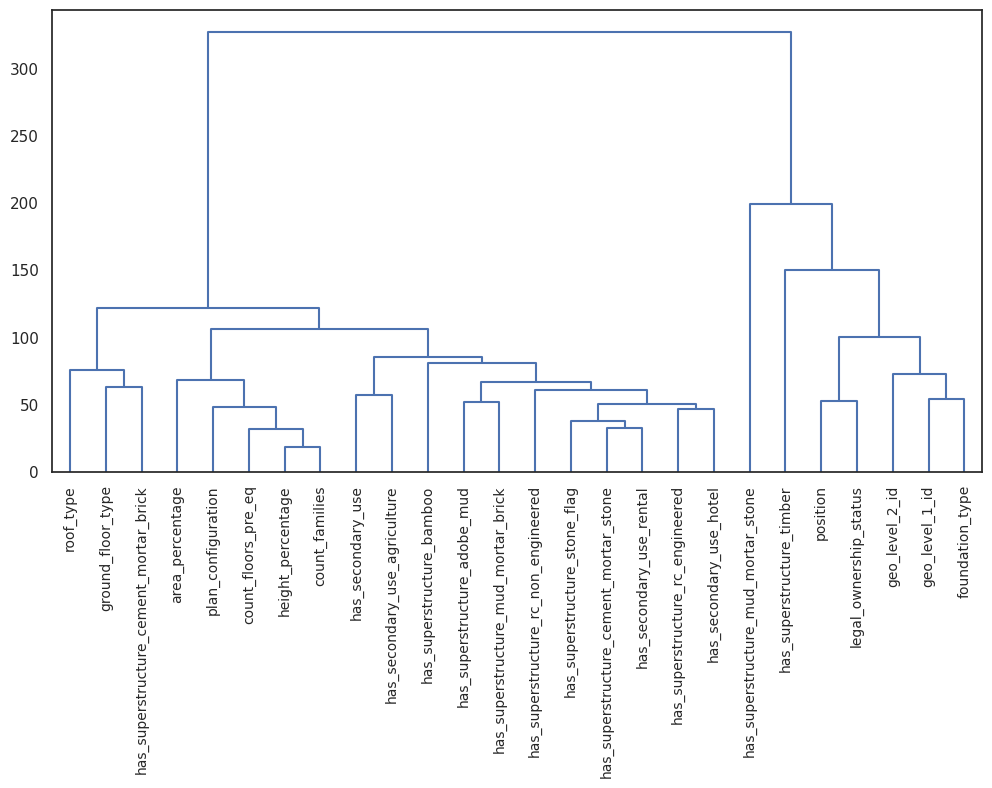

In [16]:
import sklearn.neighbors
from scipy import cluster

#Aquí las columnas ahora son filas, esto hace que la tarea
#del dendrograma sea más fácil.
Xt = X_best.T
#Calcular matriz de distancias
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(Xt)
#Promedio de las distancias
avD = np.average(D)

#Constuimos el dendograma
plt.figure(figsize=(12, 6))
threshold_2 = 7
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=X_best.columns.to_list(), leaf_rotation=90)
plt.show()

Hice el dendograma no como solución a la elección de características, ya que ya lo hice, sino como visualización de las características que yo he elegido que son las 26 que podemos ver aquí de manera sencilla. A simple vista y tampoco siendo un experto en lo de interpretar dendogramas, puedo ver que hay 2 grandes clusters que separan los datos. Y a su vez se separan en clusters más pequeños. Además se puede ver que debido a las distancias entre clusters hay características que se llevan mejor y peor entre ellas o que directamente tienen una correlación muy baja. Además para poder ver la correlación entre las características debemos ver cuan baja es la línea que los une, por ejemplo de los datos con mejor correlación que puedo ver son **height-porcentage** y **count_families** significando que tienen una buena relación y es buena idea tenerlos en el dataset. Ya por el otro lado tenemos características como **roof type** el cual se relaciona con dos características pero su barra es alta. En general y a simple vista, creo que son un buen conjuto de datos con los cuales trabajar ya que representan buenas relaciones.

# Entrenamos el modelo con SVM

In [51]:
modelo = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.40, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=100)

modelo.fit(X_train,y_train)
#Usando los datos de prueba
y_pred = modelo.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"El resultado del f1-score de lo datos de prueba es de:",round((f1),2))

#Usando los datos de validación
y_pred_val = modelo.predict(X_val)
f1 = f1_score(y_val, y_pred_val, average='weighted')
print("El resultado del f1-score del los datos de validación es de: ", round(f1,2))

El resultado del f1-score de lo datos de prueba es de: 0.55
El resultado del f1-score del los datos de validación es de:  0.53


In [59]:
# y_pred = modelo.predict(X_test_org)
# #Importar modelo.
# submission =  pd.read_csv("https://raw.githubusercontent.com/Yamito548/Proyecto-terremoto/main/submission_format%20(2).csv",sep=',')
# submission['damage_grade'] = y_pred
# submission.to_csv('prueba5.csv', index=False)

Es bastante bajo el f1-score que nos da, es por ello que vamos a intentar mejorar este porcentaje. Es por ello que revisaremos que si con cross validation mejora el modelo, aunque no sé si será así ya que cross validation es mejor cuanto más pequeño sea el dataset y el que estamos usando es enorme, pero vamos a ver. Además, en este caso he añadido datos de validación y como se puede apreciar baja un poco el f1-score pero tampoco es una diferencia demasiada grande.

# Entrenamos el modelo con LGBMClassifier

In [55]:
from lightgbm import LGBMClassifier
modelo = LGBMClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.40, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=100)

modelo.fit(X_train, y_train)
#Datos de prueba
y_pred = modelo.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("El resultado del f1-score para datos test es de:", round(f1,2))

#Datos de validación
y_pred_val = modelo.predict(X_val)
f1 = f1_score(y_val, y_pred_val, average="weighted")
print("El resultado del f1-score para datos de validación es de:", round(f1,2))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 26
[LightGBM] [Info] Start training from score -1.091637
[LightGBM] [Info] Start training from score -1.098946
[LightGBM] [Info] Start training from score -1.105301
El resultado del f1-score para datos test es de: 0.67
El resultado del f1-score para datos de validación es de: 0.66


In [58]:
# y_pred = modelo.predict(X_test_org)
# #Importar modelo.
# submission =  pd.read_csv("https://raw.githubusercontent.com/Yamito548/Proyecto-terremoto/main/submission_format%20(2).csv",sep=',')
# submission['damage_grade'] = y_pred
# submission.to_csv('prueba6.csv', index=False)

Comparando ambos modelos, LGBMClassifier y SVC, vemos que el que es superior es el de LGBMClassifier. Llegando a un 0,67 de f1-score. Es por ello que para las pruebas que iré haciendo usaré ambos modelos, el SVC porque me lo pide el ejercicio y el LGBMClassifier por elección propia. En este caso, el modelo en el que usé datos de validación da un peor resultado, aunque tampoco es que sea demasiado grande como en el anterior caso.

# SVM usando cross validation

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
modelo = SVC(kernel='linear')

for num in range(2,5+1):
  score = make_scorer(f1_score, average="weighted")
  kfold = cross_val_score(modelo, X_best, y, cv=num, scoring=score)
  f1_promedio = np.mean(kfold)
  print(f"El f1-score promedio con {num} es de {round(f1_promedio, 3)}")

El f1-score promedio con 2 es de 0.532
El f1-score promedio con 3 es de 0.531
El f1-score promedio con 4 es de 0.531
El f1-score promedio con 5 es de 0.529


Probé con 5, 6 y 3 folds pero no mejoró nada el modelo. Es por ello que decidí no hacer la estructura del kfold, ya que creo que no vale la pena probarlo. Con 6 folds me dio 0.53, con 5 me dio 0.52 y con 3 me dio 0.53.

# LGBMClassifier usando cross validation

In [22]:
from sklearn.metrics import make_scorer
modelo = LGBMClassifier(verbose=0)
for num in range(2,5+1):
  score = make_scorer(f1_score, average="weighted")
  kfold = cross_val_score(modelo, X_best, y, cv=num, scoring=score)
  f1_promedio = np.mean(kfold)
  print(f"El f1-score promedio con {num} es de {round(f1_promedio, 3)}")

El f1-score promedio con 2 es de 0.66
El f1-score promedio con 3 es de 0.669
El f1-score promedio con 4 es de 0.669
El f1-score promedio con 5 es de 0.669


# Entrenamiento usando randomsearch usando cross validation

Usando **lazypredict** he elegido el mejor modelo a nivel del accuracy, en este caso es LGBMClassifier. Usaré ambos para ver que tal predicen ambos.

Vamos a usar el buscador de parámetros del randomsearch para buscar los mejores parámetros para nuestros modelos. Como entenderás simplemente es con los parámetros que tenemos ir probando cuales dan los mejores resultados. Tardó un poco en procesar toda la información, es por eso que tuve que bajar las iteraciones a 10.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint
#Como modelos usaré tanto SVC y LGBMClassifier

parametros = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

parametros_lgbm = {
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0]
}

nombres = ["SVC","LGBMClassifer"]
modelos = [SVC(kernel="linear"), LGBMClassifier(verbose=0)]
param = [parametros,parametros_lgbm]
#n_jobs=-1 (usar todos los procesadores del equipo), verbose=1 (ver información del proceso de entrenamiento)
for name, classifier, param in zip(nombres, modelos,param):
  random_search = RandomizedSearchCV(classifier, param_distributions = param, n_iter=10, cv=3, n_jobs=-1, verbose=0 )
  random_search.fit(X_best,y)
  #Cross validation
  from sklearn.model_selection import cross_val_score
  print(f"Los mejores parámetros para el modelo {name} son: {random_search.best_estimator_}")
  resultado_final = random_search.best_estimator_
  resultado_final.fit(X_best,y)
  scores =  cross_val_score(resultado_final,X_best, y, cv=5)
  print(f"La precisión del modelo {name} es de {round(scores.mean(),3)}")

Los mejores parámetros para el modelo SVC son: SVC(C=10)
La precisión del modelo SVC es de 0.593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Como resultado me ha dado esto, después de hacerle un verbose al modelo LGBM que si no me daba demasiada información innecesaria. En este caso me dio resultados algo mejores que con pruebas normales, el que más destacó fue el modelo SVC que subió un poco su porcentaje de ser 0.54% a 0.58. No es demasiado, pero si trabajo poco a poco con el modelo y usando otras herramientas podría subir más. Considero que un mínimo de 65%-70% estaría aceptable. Por otro lado, el otro modelo, no ha mejorado nada tampoco.

# Modelo SVC con mejores parámetros

Ahora volvemos a entrenar el modelo pero esta vez sin bucles ni nada solo con los mejores resultados para hacer pruebas y verlo de mejor manera.

In [24]:
modelo = SVC(C=1, kernel='poly')

#Entrenamos el modelo
modelo.fit(X_best,y)

#Hacemos cross val score
scores = cross_val_score(modelo, X_best,y, cv=5)
print(f"La precisión del modelo es de {scores.mean()}")

La precisión del modelo es de 0.5822


In [25]:
#Creamos un nuevo dataset con los mejores características
X_test_org = pd.DataFrame(X_test_org, columns=select_column)
X_test_org.shape

(86868, 26)

In [26]:
#Hacemos la predicción
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.40, random_state=100)
y_pred = modelo.predict(X_test) #X_test_org
y_pred

array([3, 3, 3, ..., 3, 1, 3])

In [27]:
#Ahora haremos un f1-score para poder ver de buena forma el porcentaje de acierto
score = f1_score(y_test,y_pred, average='micro')
print(f"La precisión del modelo SVC es de {round(score,2)}")

La precisión del modelo SVC es de 0.62


Sorpresivamente, el modelo ha mejorado más aún. Al menos por el lado del f1-score. Esto es muy bueno porque el modelo esta mejorando. Aunque sigue siendo bajo para lo que me gustaría.

In [28]:
# #Importar modelo.
# submission =  pd.read_csv("https://raw.githubusercontent.com/Yamito548/Proyecto-terremoto/main/submission_format%20(2).csv",sep=',')
# submission['damage_grade'] = y_pred
# submission.to_csv('prueba.csv', index=False)

Matriz de correlación SVC

MODELO SVC


Text(0.5, 1.0, 'Exactitud: 0.5822')

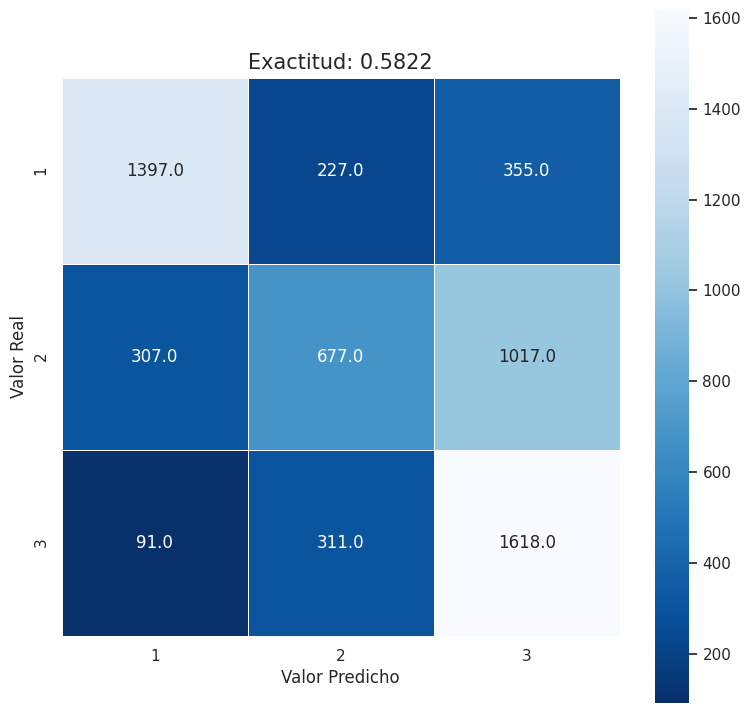

In [29]:
#Ahora haremos la matriz de correlación para poder ver de otra forma que también predice el modelo
from sklearn.metrics import confusion_matrix
print("MODELO SVC")
cm = confusion_matrix(y_test, y_pred[0:len(y)], labels=[1,2,3])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r',yticklabels=[1,2,3],xticklabels=[1,2,3])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
all_sample_title = 'Exactitud: {0}'.format(scores.mean())
plt.title(all_sample_title, size = 15)

Viendo la matriz de correlación podemos ver que el valor que más aciertos tiene es el 1. Esto es normal ya que el porcentaje de acierto es solo del 0.58% siendo bajo por lo que es normal que nos de este tipo de resultados.

# Modelo LGBMClassifer con mejores parámetros

Ahora entrenamos el modelo LGBMClassifier con sus mejores parámetros.

In [30]:
modelo = LGBMClassifier(learning_rate=0.05, min_child_samples=10, n_estimators=150,num_leaves=40, verbose=0)

#Entrenamos el modelo
modelo.fit(X_best,y)

#Hacemos cross val score
scores = cross_val_score(modelo, X_best,y, cv=5)
print(f"La precisión del modelo es de {scores.mean()}")

La precisión del modelo es de 0.671


In [31]:
#Hacemos la predicción
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.40, random_state=100)
y_pred = modelo.predict(X_test) #X_test_org
y_pred

array([2, 3, 2, ..., 2, 1, 2])

In [32]:
# #Importar modelo.
# submission =  pd.read_csv("https://raw.githubusercontent.com/Yamito548/Proyecto-terremoto/main/submission_format%20(2).csv",sep=',')
# submission['damage_grade'] = y_pred
# submission.to_csv('prueba2.csv', index=False)

In [33]:
#Ahora haremos un f1-score para poder ver de buena forma el porcentaje de acierto
score = f1_score(y_test,y_pred, average='micro')
print(f"La precisión del modelo LGBMClassifier es de {round(score,2)}")

La precisión del modelo LGBMClassifier es de 0.75


Vemos que el f1-score es más alto que el del modelo SVC, como ya he dicho varias veces por ahora este modelo lo supera en precisión.

MODELO LGBMClassifier


Text(0.5, 1.0, 'Exactitud: 0.671')

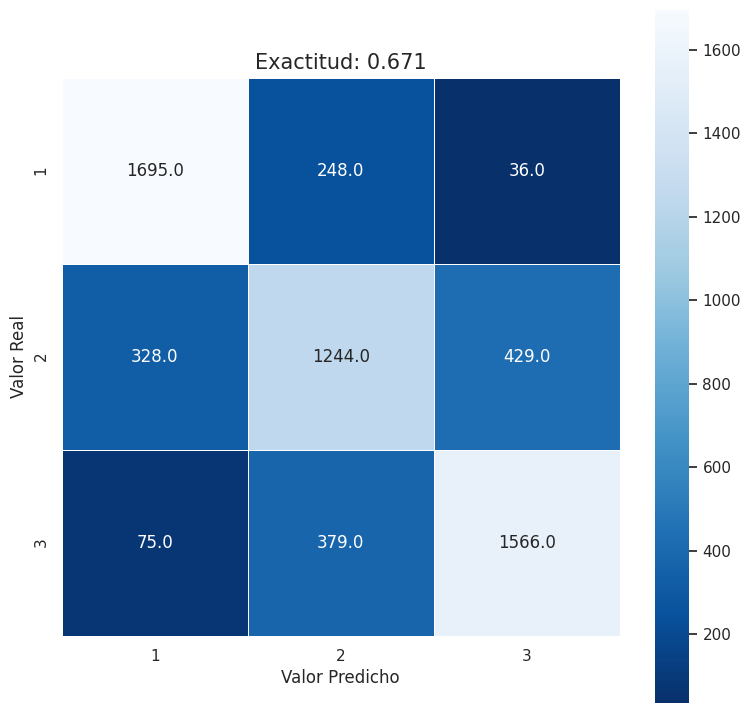

In [34]:
#Ahora haremos la matriz de confusión para poder ver de otra forma que también predice el modelo
from sklearn.metrics import confusion_matrix
print("MODELO LGBMClassifier")
cm = confusion_matrix(y_test, y_pred[0:len(y)], labels=[1,2,3])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r',yticklabels=[1,2,3],xticklabels=[1,2,3])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
all_sample_title = 'Exactitud: {0}'.format(scores.mean())
plt.title(all_sample_title, size = 15)

Aquí vemos una mejora de la anterior matriz de confusión, dándonos mejores resultados. Siendo normal debido a que tiene una mayor precisión.

# Entrenamiento usando gridsearchCV usando cross validation

In [35]:
from sklearn.model_selection import GridSearchCV
#Como modelos usaré tanto SVC y LGBMClassifier

parametros = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

parametros_lgbm = {
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0]
}

nombres = ["SVC","LGBMClassifer"]
modelos = [SVC(kernel="linear"), LGBMClassifier(verbose=0)]
param = [parametros,parametros_lgbm]
#n_jobs=-1 (usar todos los procesadores del equipo), verbose=1 (ver información del proceso de entrenamiento)
for name, classifier, param in zip(nombres, modelos,param):
  grid_search = GridSearchCV(classifier, param_grid = param, cv=3, n_jobs=-1, verbose=0 )
  grid_search.fit(X_best,y)
  #Cross validation
  from sklearn.model_selection import cross_val_score
  print(f"Los mejores parámetros para el modelo {name} son: {grid_search.best_estimator_}")
  resultado_final = grid_search.best_estimator_
  resultado_final.fit(X_best,y)
  scores =  cross_val_score(resultado_final,X_best, y, cv=5)
  print(f"La precisión del modelo {name} es de {round(scores.mean(),3)}")

Los mejores parámetros para el modelo SVC son: SVC(C=10)
La precisión del modelo SVC es de 0.593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

# Modelo SVC con mejores parámetros

In [36]:
modelo = SVC(C=10)

#Entrenamos el modelo
modelo.fit(X_best,y)

#Hacemos cross val score
scores = cross_val_score(modelo, X_best,y, cv=5)
print(f"La precisión del modelo es de {scores.mean()}")

La precisión del modelo es de 0.5926666666666666


In [46]:
#Hacemos la predicción
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.40, random_state=100)
y_pred = modelo.predict(X_test) #X_test_org
y_pred

array([3, 2, 2, ..., 1, 2, 1])

In [47]:
# #Importar modelo.
# submission =  pd.read_csv("https://raw.githubusercontent.com/Yamito548/Proyecto-terremoto/main/submission_format%20(2).csv",sep=',')
# submission['damage_grade'] = y_pred
# submission.to_csv('prueba4.csv', index=False)

In [38]:
#Ahora haremos un f1-score para poder ver de buena forma el porcentaje de acierto
score = f1_score(y_test,y_pred, average='micro')
print(f"La precisión del modelo SVC es de {round(score,2)}")

La precisión del modelo SVC es de 0.65


MODELO SVC


Text(0.5, 1.0, 'Exactitud: 0.5926666666666666')

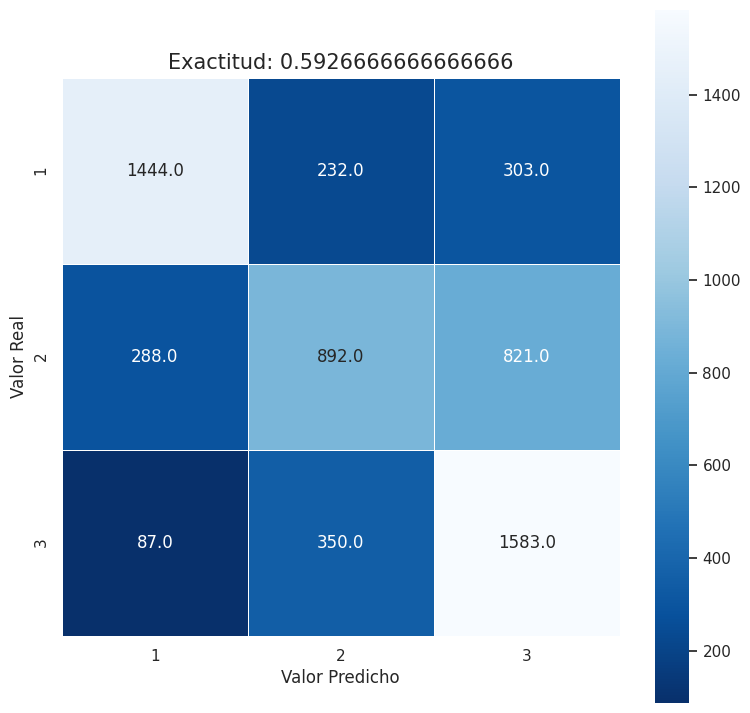

In [39]:
#Ahora haremos la matriz de confusión para poder ver de otra forma que también predice el modelo
from sklearn.metrics import confusion_matrix
print("MODELO SVC")
cm = confusion_matrix(y_test, y_pred[0:len(y)], labels=[1,2,3])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r',yticklabels=[1,2,3],xticklabels=[1,2,3])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
all_sample_title = 'Exactitud: {0}'.format(scores.mean())
plt.title(all_sample_title, size = 15)

# Modelo LGBMClassifer con mejores parámetros

In [61]:
modelo = LGBMClassifier(learning_rate=0.2,max_depth=5,n_estimators=150, num_leaves=30, verbose=0)

#Entrenamos el modelo
modelo.fit(X_best,y)

#Hacemos cross val score
scores = cross_val_score(modelo, X_best,y, cv=5)
print(f"La precisión del modelo es de {scores.mean()}")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [62]:
#Hacemos la predicción
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.40, random_state=100)
y_pred = modelo.predict(X_test) #X_test_org
y_pred

array([3, 2, 2, ..., 1, 2, 1])

In [65]:
# #Importar modelo.
# submission =  pd.read_csv("https://raw.githubusercontent.com/Yamito548/Proyecto-terremoto/main/submission_format%20(2).csv",sep=',')
# submission['damage_grade'] = y_pred
# submission.to_csv('prueba_final.csv', index=False)

In [43]:
#Ahora haremos un f1-score para poder ver de buena forma el porcentaje de acierto
score = f1_score(y_test,y_pred, average='micro')
print(f"La precisión del modelo LGBMClassifier es de {round(score,2)}")

La precisión del modelo LGBMClassifier es de 0.78


MODELO LGBMClassifier


Text(0.5, 1.0, 'Exactitud: 0.6759999999999999')

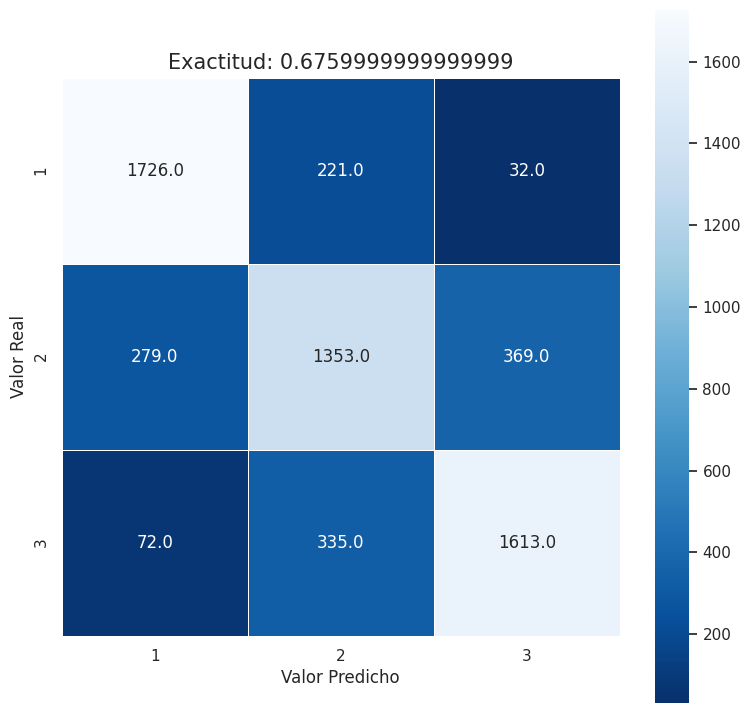

In [44]:
#Ahora haremos la matriz de confusión para poder ver de otra forma que también predice el modelo
from sklearn.metrics import confusion_matrix
print("MODELO LGBMClassifier")
cm = confusion_matrix(y_test, y_pred[0:len(y)], labels=[1,2,3])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r',yticklabels=[1,2,3],xticklabels=[1,2,3])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
all_sample_title = 'Exactitud: {0}'.format(scores.mean())
plt.title(all_sample_title, size = 15)

La selección de los modelos fue llevada a cabo a través de la librería lazypredict. Quería objetivamente los mejores modelos para poder entrenar mis modelos y gracias a esta librería pude decantarme por estos dos. LGBMClassifier fue simplemente elegido porque a la hora de usar lazypredict, fue el que me dio mejores resultados, además de que al ser un modelo que nunca había usado con anterioridad me daba curiosidad el probarlo y ver su rendimiento. Ya por el lado del modelo de SVM, fue simplemente porque en la actividad me pedía que uno de los modelos fuera de regresión o SVM, y como no he usado mucho este tipo de modelos me decante por el modelo SVC, el cual desde un principio y hasta viéndolo en el lazy predict me daba un rendimiento algo bajo, pero decidí seguir con este debido a que quería ver cuanto podría mejorarlo.

No pude solucionar el problema de que me saliera todas esas líneas en el LGBMclassifier. Intenté usando el parámetro verbose=0 pero ni con eso me quitó toda esa información.